# 0. quick start

In [45]:
import torch
from torch import nn
from torch.utils.data import DataLoader
from torchvision import datasets
from torchvision.transforms import ToTensor, Lambda, Compose
import matplotlib.pyplot as plt

In [46]:
training_data = datasets.FashionMNIST(root="data",
                                      train=True,
                                      download=True,
                                      transform=ToTensor())
test_data = datasets.FashionMNIST(root="data",
                                      train=False,
                                      download=True,
                                      transform=ToTensor())


In [47]:
batch_size=64
train_dataloader=DataLoader(training_data, batch_size=batch_size)
test_dataloader= DataLoader(test_data, batch_size=batch_size)

for X,y in test_dataloader:
  print("shape of X[N, C, H, W]:", X.shape)
  print("shape of Y:", y.shape, y.dtype)
  break

shape of X[N, C, H, W]: torch.Size([64, 1, 28, 28])
shape of Y: torch.Size([64]) torch.int64


In [48]:
device = "cuda" if torch.cuda.is_available() else "cpu"
print("using {} device".format(device))
class NeuralNetwork(nn.Module):
  def __init__(self):
    super(NeuralNetwork, self).__init__() # nn.module에서 가져오기위해
    self.flatten = nn.Flatten()
    self.linear_relu_stack = nn.Sequential(
        nn.Linear(28*28, 512),
        nn.ReLU(),
        nn.Linear(512, 512),
        nn.ReLU(),
        nn.Linear(512, 10),
    )
  def forward(self,x):
    x=self.flatten(x)
    logits=self.linear_relu_stack(x)
    return logits
  
model = NeuralNetwork().to(device)
print(model)

using cpu device
NeuralNetwork(
  (flatten): Flatten(start_dim=1, end_dim=-1)
  (linear_relu_stack): Sequential(
    (0): Linear(in_features=784, out_features=512, bias=True)
    (1): ReLU()
    (2): Linear(in_features=512, out_features=512, bias=True)
    (3): ReLU()
    (4): Linear(in_features=512, out_features=10, bias=True)
  )
)


# 모델 최적화

In [49]:
loss_fn = nn.CrossEntropyLoss()
optimizer=torch.optim.SGD(model.parameters(), lr=1e-3)

In [50]:
def train(dataloader, model, loss_fn, optimizer):
  size = len(dataloader.dataset)
  model.train()
  for batch, (X, y) in enumerate(dataloader):
    X, y = X.to(device), y.to(device)
    pred = model(X)
    loss = loss_fn(pred, y)

    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
    if batch % 100 == 0:
      loss, current = loss.item(), batch*len(X)
      print(f"loss: {loss:>7f} [{current:>5d}/{size:>5d}]")

In [51]:
def test(dataloader, model, loss_fn):
  size = len(dataloader.dataset)
  num_batches = len(dataloader)
  model.eval()
  test_loss, correct = 0, 0
  with torch.no_grad():
    for X, y in dataloader:
      X, y = X.to(device), y.to(device)
      pred = model(X)
      test_loss += loss_fn(pred, y).item()
      correct += (pred.argmax(1)==y).type(torch.float).sum().item()
  test_loss /= num_batches
  correct /= size
  print(f"Test Error : |n Accuracy:{(100*correct):>0.1f}%, avgloss: {test_loss:>8f} |n")

In [52]:
epochs = 5
for t in range(epochs):
  print(f"Epoch {t+1}|n--------------")
  train(train_dataloader, model, loss_fn, optimizer)
  test(test_dataloader, model, loss_fn)
  print("DONE!")

Epoch 1|n--------------
loss: 2.300939 [    0/60000]
loss: 2.287468 [ 6400/60000]
loss: 2.269239 [12800/60000]
loss: 2.264663 [19200/60000]
loss: 2.248616 [25600/60000]
loss: 2.220485 [32000/60000]
loss: 2.221078 [38400/60000]
loss: 2.193626 [44800/60000]
loss: 2.181703 [51200/60000]
loss: 2.147693 [57600/60000]
Test Error : |n Accuracy:49.3%, avgloss: 2.154956 |n
DONE!
Epoch 2|n--------------
loss: 2.160426 [    0/60000]
loss: 2.150639 [ 6400/60000]
loss: 2.101544 [12800/60000]
loss: 2.123916 [19200/60000]
loss: 2.061261 [25600/60000]
loss: 2.006832 [32000/60000]
loss: 2.025630 [38400/60000]
loss: 1.952343 [44800/60000]
loss: 1.949193 [51200/60000]
loss: 1.873352 [57600/60000]
Test Error : |n Accuracy:56.5%, avgloss: 1.889215 |n
DONE!
Epoch 3|n--------------
loss: 1.915530 [    0/60000]
loss: 1.883866 [ 6400/60000]
loss: 1.783535 [12800/60000]
loss: 1.830875 [19200/60000]
loss: 1.705288 [25600/60000]
loss: 1.664204 [32000/60000]
loss: 1.678895 [38400/60000]
loss: 1.583867 [44800/60000

In [53]:
torch.save(model.state_dict(), "model.pth")
print("Saved PyTorch Model State to model.pth")

Saved PyTorch Model State to model.pth


In [54]:
model = NeuralNetwork()
model.load_state_dict(torch.load("model.pth"))

<All keys matched successfully>

In [55]:
classes = [
    "T-shirt/top",
    "Trouser",
    "Pullover",
    "Dress",
    "Coat",
    "Sandal",
    "Shirt",
    "Sneaker",
    "Bag",
    "Ankle boot",
]

model.eval()
x, y = test_data[0][0], test_data[0][1]
with torch.no_grad():
  pred=model(x)
  predicted, actual = classes[pred[0].argmax(0)], classes[y]
  print(f'Predicted: "{predicted}", Actual: "{actual}"')


Predicted: "Ankle boot", Actual: "Ankle boot"


# Tensors

In [56]:
import numpy as np

In [57]:
data = [[1, 2],[3, 4]]
x_data = torch.tensor(data)

In [58]:
np_array = np.array(data)
np_array

array([[1, 2],
       [3, 4]])

In [59]:
x_np = torch.from_numpy(np_array)
x_np

tensor([[1, 2],
        [3, 4]])

In [60]:
x_ones = torch.ones_like(x_data)
print(f"Ones Tensor: \n {x_ones} \n")
x_rand = torch.rand_like(x_data, dtype=torch.float)
print(f"Random Tensor: \n {x_rand} \n")

Ones Tensor: 
 tensor([[1, 1],
        [1, 1]]) 

Random Tensor: 
 tensor([[0.3267, 0.4863],
        [0.4707, 0.6359]]) 



In [61]:
shape = (2,3,)
rand_tensor = torch.rand(shape)
ones_tensor = torch.ones(shape)
zeros_tensor = torch.zeros(shape)

print(f"Random Tensor: \n {rand_tensor} \n")
print(f"Ones Tensor: \n {ones_tensor} \n")
print(f"Zeros Tensor: \n {zeros_tensor}")

Random Tensor: 
 tensor([[0.3267, 0.9291, 0.1623],
        [0.7825, 0.6494, 0.0264]]) 

Ones Tensor: 
 tensor([[1., 1., 1.],
        [1., 1., 1.]]) 

Zeros Tensor: 
 tensor([[0., 0., 0.],
        [0., 0., 0.]])


In [62]:
# 텐서의 특성
tensor = torch.rand(3,4)
print(f"shpae of tensor: {tensor.shape}")
print(f"datatype of tensor: {tensor.dtype}")
print(f"Device tensor is stored on : {tensor.device}")

shpae of tensor: torch.Size([3, 4])
datatype of tensor: torch.float32
Device tensor is stored on : cpu


In [63]:
if torch.cuda.is_available():
  tensor = tensor.to('cuda')

In [64]:
tensor = torch.ones(4, 4)
print('First row: ', tensor[0])
print('First column: ', tensor[:, 0])
print('Last column:', tensor[..., -1])
tensor[:,1] = 0
print(tensor)

First row:  tensor([1., 1., 1., 1.])
First column:  tensor([1., 1., 1., 1.])
Last column: tensor([1., 1., 1., 1.])
tensor([[1., 0., 1., 1.],
        [1., 0., 1., 1.],
        [1., 0., 1., 1.],
        [1., 0., 1., 1.]])


In [65]:
t1 = torch.cat([tensor, tensor, tensor], dim=1)
print(t1)

tensor([[1., 0., 1., 1., 1., 0., 1., 1., 1., 0., 1., 1.],
        [1., 0., 1., 1., 1., 0., 1., 1., 1., 0., 1., 1.],
        [1., 0., 1., 1., 1., 0., 1., 1., 1., 0., 1., 1.],
        [1., 0., 1., 1., 1., 0., 1., 1., 1., 0., 1., 1.]])


In [66]:
y1 = tensor @tensor.T
y2 = tensor.matmul(tensor.T)
y3 = torch.rand_like(tensor)
torch.matmul(tensor, tensor.T, out=y3)

z1 = tensor*tensor
z2 = tensor.mul(tensor)
z3 = torch.rand_like(tensor)
torch.mul(tensor, tensor, out=z3)

tensor([[1., 0., 1., 1.],
        [1., 0., 1., 1.],
        [1., 0., 1., 1.],
        [1., 0., 1., 1.]])

In [67]:
# 하나의 요소이면, item으로 파이썬 값으로 변환
agg = tensor.sum()
agg_item = agg.item()
print(agg_item, type(agg_item))

12.0 <class 'float'>


In [68]:
print(tensor, "\n")
tensor.add_(5)
print(tensor)

tensor([[1., 0., 1., 1.],
        [1., 0., 1., 1.],
        [1., 0., 1., 1.],
        [1., 0., 1., 1.]]) 

tensor([[6., 5., 6., 6.],
        [6., 5., 6., 6.],
        [6., 5., 6., 6.],
        [6., 5., 6., 6.]])


In [69]:
t = torch.ones(5)
print(f"t: {t}")
n = t.numpy()
print(f"n: {n}")

t: tensor([1., 1., 1., 1., 1.])
n: [1. 1. 1. 1. 1.]


In [70]:
# 넘파이랑 텐서랑 공유됨
t.add_(1)
print(f"t: {t}")
print(f"n: {n}")

t: tensor([2., 2., 2., 2., 2.])
n: [2. 2. 2. 2. 2.]


In [71]:
n = np.ones(5)
t = torch.from_numpy(n)

In [72]:
np.add(n, 1, out=n)
print(f"t: {t}")
print(f"n: {n}")

t: tensor([2., 2., 2., 2., 2.], dtype=torch.float64)
n: [2. 2. 2. 2. 2.]


# Dataset&DataLoader
- torch.utils.data.DataLoader : Dataset 반복되어있음
- torch.utils.data.Dataset : 샘플과 corresponding labels 저장

In [80]:
training_data = datasets.FashionMNIST(
    root="data",
    train=True,
    download=True,
    transform=ToTensor()
)

test_data = datasets.FashionMNIST(
    root="data",
    train=False,
    download=True,
    transform=ToTensor()
)

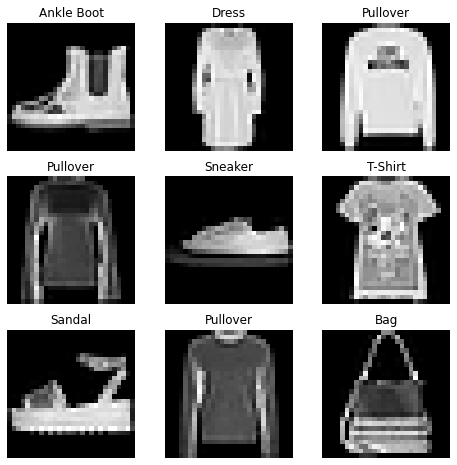

In [81]:
labels_map = {
    0: "T-Shirt",
    1: "Trouser",
    2: "Pullover",
    3: "Dress",
    4: "Coat",
    5: "Sandal",
    6: "Shirt",
    7: "Sneaker",
    8: "Bag",
    9: "Ankle Boot",
}
figure = plt.figure(figsize=(8, 8))
cols, rows = 3, 3
for i in range(1, cols * rows + 1):
    sample_idx = torch.randint(len(training_data), size=(1,)).item()
    img, label = training_data[sample_idx]
    figure.add_subplot(rows, cols, i)
    plt.title(labels_map[label])
    plt.axis("off")
    plt.imshow(img.squeeze(), cmap="gray")
plt.show()

In [ ]:
import os
import pandas as pd
from torchvision.io import read_image

class CustomImageDataset(Dataset):
  def __init__(self, annotations_file, img_dir, transform=None, target_transform=None): # data set instant
    self.img_labels = pd.read_csv(annotations_file)
    self.img_dir=img_dir
    self.transform=transform
    self.target_transform=target_transform

  def __len__(self): #데이터셋의 길이
    return len(self.img_labels)

  def __getitem__(self, idx): # 지정된 idx에서 샘플 반환
    img_path = os.path.join(self.img_dir, self.img_labels.iloc[idx, 0])
    image = read_imgae(img_path)
    label = self.img_labels.iloc[idx, 1]
    if self.transform:
      image=self.transform(image)
    if self.target_transform:
      label = self.target_transform(label)
    return image, label

In [82]:
train_dataloader = DataLoader(training_data, batch_size=64, shuffle=True)
test_dataloader = DataLoader(test_data, batch_size=64, shuffle=True)

Feature batch shape: torch.Size([64, 1, 28, 28])
Labels batch shape: torch.Size([64])


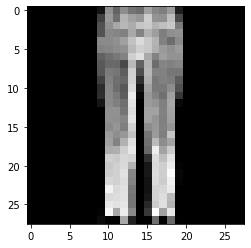

Label: 1


In [83]:
train_features, train_labels = next(iter(train_dataloader))
print(f"Feature batch shape: {train_features.size()}")
print(f"Labels batch shape: {train_labels.size()}")
img = train_features[0].squeeze()
label = train_labels[0]
plt.imshow(img, cmap="gray")
plt.show()
print(f"Label: {label}")

# Transforms

In [84]:
import torch
from torchvision import datasets
from torchvision.transforms import ToTensor, Lambda

ds = datasets.FashionMNIST(
    root="data",
    train=True,
    download=True,
    transform=ToTensor(), # 이미지 또는 넘파이를 0~1사이 텐서로 바꾸어줌
    target_transform=Lambda(lambda y: torch.zeros(10, dtype=torch.float).scatter_(0, torch.tensor(y), value=1)) # Lambda one hot인코딩
)

# Build NN

In [ ]:
import os
import torch
from torch import nn # 신경망을 구축하는데 필요한 모듈 제공
from torch.utils.data import DataLoader
from torchvision import datasets, transforms

In [85]:
device = "cuda" if torch.cuda.is_available() else "cpu"
print("using {} device".format(device))
class NeuralNetwork(nn.Module): # 모듈을 subclassing, 그리고 __init__으로 레이어 초기화
  def __init__(self):
    super(NeuralNetwork, self).__init__() # nn.module에서 가져오기위해
    self.flatten = nn.Flatten()
    self.linear_relu_stack = nn.Sequential(
        nn.Linear(28*28, 512),
        nn.ReLU(),
        nn.Linear(512, 512),
        nn.ReLU(),
        nn.Linear(512, 10),
    )
  def forward(self,x):
    x=self.flatten(x)
    logits=self.linear_relu_stack(x)
    return logits
  
model = NeuralNetwork().to(device)
print(model)

using cpu device
NeuralNetwork(
  (flatten): Flatten(start_dim=1, end_dim=-1)
  (linear_relu_stack): Sequential(
    (0): Linear(in_features=784, out_features=512, bias=True)
    (1): ReLU()
    (2): Linear(in_features=512, out_features=512, bias=True)
    (3): ReLU()
    (4): Linear(in_features=512, out_features=10, bias=True)
  )
)


In [86]:
X = torch.rand(1, 28, 28, device=device)
logits = model(X)
pred_probab = nn.Softmax(dim=1)(logits)
y_pred = pred_probab.argmax(1)
print(f"Predicted class: {y_pred}")

Predicted class: tensor([6])


In [87]:
input_image = torch.rand(3,28,28)
print(input_image.size())

torch.Size([3, 28, 28])


In [88]:
flatten = nn.Flatten() #이미지 펴는 작업
flat_image = flatten(input_image)
print(flat_image.size())

torch.Size([3, 784])


In [89]:
layer1 = nn.Linear(in_features=28*28, out_features=20)
hidden1 = layer1(flat_image)
print(hidden1.size())

torch.Size([3, 20])


In [90]:
# 활성함수
print(f"Before ReLU: {hidden1}\n\n")
hidden1 = nn.ReLU()(hidden1)
print(f"After ReLU: {hidden1}")

Before ReLU: tensor([[ 0.2769, -0.1755,  0.1162, -0.2517,  0.7439,  0.1862, -0.1313, -0.0953,
          0.3406,  0.4089, -0.0471, -0.5181, -0.6907, -0.0126, -0.0047,  0.0434,
         -0.5483,  0.5421,  0.2693, -0.5808],
        [ 0.1415,  0.0209,  0.1017, -0.3574,  0.6166,  0.3126, -0.1032,  0.2165,
          0.3580,  0.1044,  0.0767, -0.2149, -0.3649, -0.1143,  0.2825,  0.0421,
         -0.2385,  0.7078,  0.2740, -0.3146],
        [ 0.2938,  0.0196, -0.1038, -0.5660,  0.5627,  0.1874, -0.0041, -0.2688,
          0.5895, -0.0068,  0.0583, -0.5590, -0.5006, -0.1597,  0.0536, -0.1122,
         -0.3367,  0.8923,  0.2304, -0.2985]], grad_fn=<AddmmBackward>)


After ReLU: tensor([[0.2769, 0.0000, 0.1162, 0.0000, 0.7439, 0.1862, 0.0000, 0.0000, 0.3406,
         0.4089, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0434, 0.0000, 0.5421,
         0.2693, 0.0000],
        [0.1415, 0.0209, 0.1017, 0.0000, 0.6166, 0.3126, 0.0000, 0.2165, 0.3580,
         0.1044, 0.0767, 0.0000, 0.0000, 0.0000, 0.282

In [91]:
seq_modules = nn.Sequential(
    flatten,
    layer1,
    nn.ReLU(),
    nn.Linear(20, 10)
)
input_image = torch.rand(3,28,28)
logits = seq_modules(input_image)

In [ ]:
# softmax로 조정 차원이 1
softmax = nn.Softmax(dim=1)
pred_probab = softmax(logits)

In [92]:
# parameters() or named_parameters()로 파라메터 계산
print("Model structure: ", model, "\n\n")

for name, param in model.named_parameters():
    print(f"Layer: {name} | Size: {param.size()} | Values : {param[:2]} \n")

Model structure:  NeuralNetwork(
  (flatten): Flatten(start_dim=1, end_dim=-1)
  (linear_relu_stack): Sequential(
    (0): Linear(in_features=784, out_features=512, bias=True)
    (1): ReLU()
    (2): Linear(in_features=512, out_features=512, bias=True)
    (3): ReLU()
    (4): Linear(in_features=512, out_features=10, bias=True)
  )
) 


Layer: linear_relu_stack.0.weight | Size: torch.Size([512, 784]) | Values : tensor([[-0.0265,  0.0073,  0.0055,  ...,  0.0004,  0.0077,  0.0167],
        [-0.0328,  0.0163, -0.0059,  ..., -0.0342, -0.0075,  0.0031]],
       grad_fn=<SliceBackward>) 

Layer: linear_relu_stack.0.bias | Size: torch.Size([512]) | Values : tensor([ 0.0155, -0.0133], grad_fn=<SliceBackward>) 

Layer: linear_relu_stack.2.weight | Size: torch.Size([512, 512]) | Values : tensor([[ 0.0367,  0.0023, -0.0420,  ..., -0.0018,  0.0307, -0.0243],
        [-0.0154, -0.0129,  0.0098,  ...,  0.0437,  0.0170,  0.0170]],
       grad_fn=<SliceBackward>) 

Layer: linear_relu_stack.2.bias | S

# Troch autograd : backpropa 자동계산

In [94]:
import torch

x = torch.ones(5) 
y = torch.zeros(3)
w = torch.randn(5, 3, requires_grad=True) # requires_grad를 사용하면 compute cost 해줌
b = torch.randn(3, requires_grad=True)
z = torch.matmul(x, w)+b
loss = torch.nn.functional.binary_cross_entropy_with_logits(z, y)

In [95]:
print('Gradient function for z =', z.grad_fn)
print('Gradient function for loss =', loss.grad_fn)

Gradient function for z = <AddBackward0 object at 0x7f5685f3ae50>
Gradient function for loss = <BinaryCrossEntropyWithLogitsBackward object at 0x7f5685f3aa90>


In [96]:
loss.backward()
print(w.grad)
print(b.grad)

tensor([[0.2462, 0.3269, 0.0006],
        [0.2462, 0.3269, 0.0006],
        [0.2462, 0.3269, 0.0006],
        [0.2462, 0.3269, 0.0006],
        [0.2462, 0.3269, 0.0006]])
tensor([0.2462, 0.3269, 0.0006])


In [97]:
z = torch.matmul(x, w)+b
print(z.requires_grad)

with torch.no_grad(): #no grad를 사용하면 tracking 안함
    z = torch.matmul(x, w)+b
print(z.requires_grad)

True
False


In [98]:
z = torch.matmul(x, w)+b
z_det = z.detach() #detach를 사용해도 no_grad와 같은 역할
print(z_det.requires_grad)

False


일부 매개변수를 동결하고 싶을떄(모델 미세 조정)
/ 학습시 계산속도를 올리기 위해
<br>

autograd in forward : 요청한 연산을 실행하여 결과 텐서 계산, a directed acyclic graph에서 작업 유지
<br>
autograd in backward : 각각의 grad_fn에서 기울기 계산, 각 텐서의 grad 속성에 누적, 체인 규칙으로 리프텐서로 전파

In [99]:
inp = torch.eye(5, requires_grad=True)
out = (inp+1).pow(2)
out.backward(torch.ones_like(inp), retain_graph=True)
print("First call\n", inp.grad)
out.backward(torch.ones_like(inp), retain_graph=True) # backward를 누적한다. 
print("\nSecond call\n", inp.grad)
inp.grad.zero_() # backward를 누적하기때문에 속성을 0으로 설정
out.backward(torch.ones_like(inp), retain_graph=True)
print("\nCall after zeroing gradients\n", inp.grad)

First call
 tensor([[4., 2., 2., 2., 2.],
        [2., 4., 2., 2., 2.],
        [2., 2., 4., 2., 2.],
        [2., 2., 2., 4., 2.],
        [2., 2., 2., 2., 4.]])

Second call
 tensor([[8., 4., 4., 4., 4.],
        [4., 8., 4., 4., 4.],
        [4., 4., 8., 4., 4.],
        [4., 4., 4., 8., 4.],
        [4., 4., 4., 4., 8.]])

Call after zeroing gradients
 tensor([[4., 2., 2., 2., 2.],
        [2., 4., 2., 2., 2.],
        [2., 2., 4., 2., 2.],
        [2., 2., 2., 4., 2.],
        [2., 2., 2., 2., 4.]])


# optimizing model

In [100]:
import torch
from torch import nn
from torch.utils.data import DataLoader
from torchvision import datasets
from torchvision.transforms import ToTensor, Lambda

training_data = datasets.FashionMNIST(
    root="data",
    train=True,
    download=True,
    transform=ToTensor()
)

test_data = datasets.FashionMNIST(
    root="data",
    train=False,
    download=True,
    transform=ToTensor()
)

train_dataloader = DataLoader(training_data, batch_size=64)
test_dataloader = DataLoader(test_data, batch_size=64)

class NeuralNetwork(nn.Module):
    def __init__(self):
        super(NeuralNetwork, self).__init__()
        self.flatten = nn.Flatten()
        self.linear_relu_stack = nn.Sequential(
            nn.Linear(28*28, 512),
            nn.ReLU(),
            nn.Linear(512, 512),
            nn.ReLU(),
            nn.Linear(512, 10),
        )

    def forward(self, x):
        x = self.flatten(x)
        logits = self.linear_relu_stack(x)
        return logits

model = NeuralNetwork()

In [101]:
learning_rate = 1e-3 #학습률
batch_size = 64 # 배치
epochs = 5 # 학습

In [103]:
loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate)

최적화 단계 : 
1. optimizer.zero_grad() : 모델 매개변수의 기울기를 재설정하기위해 호출
2. loss.backwards 역전파
3. optimizer.step() : 파라메터 조정

In [104]:
def train_loop(dataloader, model, loss_fn, optimizer):
    size = len(dataloader.dataset)
    for batch, (X, y) in enumerate(dataloader):
        pred = model(X)
        loss = loss_fn(pred, y)

        optimizer.zero_grad() # 가중치 초기화
        loss.backward() # 역전파
        optimizer.step() # 파라메터 조정

        if batch % 100 == 0:
            loss, current = loss.item(), batch * len(X)
            print(f"loss: {loss:>7f}  [{current:>5d}/{size:>5d}]")


def test_loop(dataloader, model, loss_fn):
    size = len(dataloader.dataset)
    num_batches = len(dataloader)
    test_loss, correct = 0, 0

    with torch.no_grad(): # grad저장 X
        for X, y in dataloader:
            pred = model(X)
            test_loss += loss_fn(pred, y).item()
            correct += (pred.argmax(1) == y).type(torch.float).sum().item()

    test_loss /= num_batches
    correct /= size
    print(f"Test Error: \n Accuracy: {(100*correct):>0.1f}%, Avg loss: {test_loss:>8f} \n")

In [105]:
loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate)

epochs = 10
for t in range(epochs):
    print(f"Epoch {t+1}\n-------------------------------")
    train_loop(train_dataloader, model, loss_fn, optimizer)
    test_loop(test_dataloader, model, loss_fn)
print("Done!")

Epoch 1
-------------------------------
loss: 2.294857  [    0/60000]
loss: 2.290400  [ 6400/60000]
loss: 2.269941  [12800/60000]
loss: 2.268044  [19200/60000]
loss: 2.247966  [25600/60000]
loss: 2.223686  [32000/60000]
loss: 2.224564  [38400/60000]
loss: 2.191206  [44800/60000]
loss: 2.185450  [51200/60000]
loss: 2.172055  [57600/60000]
Test Error: 
 Accuracy: 45.6%, Avg loss: 2.153645 

Epoch 2
-------------------------------
loss: 2.160256  [    0/60000]
loss: 2.158150  [ 6400/60000]
loss: 2.094513  [12800/60000]
loss: 2.110878  [19200/60000]
loss: 2.061720  [25600/60000]
loss: 2.008782  [32000/60000]
loss: 2.029730  [38400/60000]
loss: 1.951551  [44800/60000]
loss: 1.947833  [51200/60000]
loss: 1.896343  [57600/60000]
Test Error: 
 Accuracy: 56.3%, Avg loss: 1.878362 

Epoch 3
-------------------------------
loss: 1.908004  [    0/60000]
loss: 1.891700  [ 6400/60000]
loss: 1.758845  [12800/60000]
loss: 1.801129  [19200/60000]
loss: 1.702408  [25600/60000]
loss: 1.649016  [32000/600

# 모델 저장 불러오기

In [106]:
import torch
import torch.onnx as onnx
import torchvision.models as models

In [107]:
model = models.vgg16(pretrained=True)
torch.save(model.state_dict(), 'model_weights.pth')

Downloading: "https://download.pytorch.org/models/vgg16-397923af.pth" to /root/.cache/torch/hub/checkpoints/vgg16-397923af.pth


  0%|          | 0.00/528M [00:00<?, ?B/s]

In [108]:
model = models.vgg16() 
model.load_state_dict(torch.load('model_weights.pth'))
model.eval()

VGG(
  (features): Sequential(
    (0): Conv2d(3, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU(inplace=True)
    (2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU(inplace=True)
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (5): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (6): ReLU(inplace=True)
    (7): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (8): ReLU(inplace=True)
    (9): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (10): Conv2d(128, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (11): ReLU(inplace=True)
    (12): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (13): ReLU(inplace=True)
    (14): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (15): ReLU(inplace=True)
    (16): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1

model.eval의 경우는 dropout, batch normalization 사용불가

In [109]:
torch.save(model, 'model.pth')
model = torch.load('model.pth')


In [110]:
input_image = torch.zeros((1,3,224,224))
onnx.export(model, input_image, 'model.onnx')

/usr/local/lib/python3.7/dist-packages/torch/nn/functional.py:718: UserWarning: Named tensors and all their associated APIs are an experimental feature and subject to change. Please do not use them for anything important until they are released as stable. (Triggered internally at  /pytorch/c10/core/TensorImpl.h:1156.)
  return torch.max_pool2d(input, kernel_size, stride, padding, dilation, ceil_mode)
